In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
from sklearn.model_selection import train_test_split
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from datetime import date


from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import timeit
from scipy.stats import shapiro
import re
from yellowbrick.datasets import load_credit

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
jeju_on_2018 = pd.read_csv('jeju_on_join_2018.csv', encoding = 'cp949')
jeju_off_2018 = pd.read_csv('jeju_off_join_2018.csv', encoding = 'cp949')
jeju_ahn_2018 = pd.concat([jeju_off_2018, jeju_on_2018])
jeju_on_2019 = pd.read_csv('jeju_on_join_2019.csv', encoding = 'cp949')
jeju_off_2019 = pd.read_csv('jeju_off_join_2019.csv', encoding = 'cp949')
jeju_ahn_2019 = pd.concat([jeju_off_2019, jeju_on_2019])
jeju_ahn = pd.concat([jeju_ahn_2018, jeju_ahn_2019])

In [ ]:
jeju_total = jeju_ahn.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total_temp = jeju_ahn.groupby(['customer_id','purchase_date']).agg({'purchase_amt':'sum','purchase_id':'count'})
jeju_total_temp.reset_index(inplace = True)
jeju_total_temp= jeju_total_temp.groupby('customer_id').agg({'purchase_date':'count', 'purchase_id':'count'})

# jeju_kmeans_royal = jeju_total[jeju_total['purchase_amt'] >= 0.5e7]
# jeju_kmeans_royal['total_grade'] = '1Royal'
#  royal 처리

jeju_kmeans_test = jeju_ahn[['customer_id','purchase_id','purchase_date','purchase_amt']].groupby('customer_id').agg({'purchase_id':'count', 'purchase_date' :'count','purchase_amt':'sum'})
jeju_kmeans_test['Recency'] = (730 / jeju_total_temp['purchase_date']).round(3) 
jeju_kmeans_test['Frequency']= jeju_total_temp['purchase_id']
jeju_kmeans_test['Monetary'] = jeju_kmeans_test['purchase_amt']

del1 = jeju_kmeans_test[jeju_kmeans_test['purchase_amt']==jeju_kmeans_test['purchase_amt'].max()].index
jeju_kmeans_test.drop(del1[0], axis = 0, inplace = True)
del2 = jeju_kmeans_test[jeju_kmeans_test['Frequency']==jeju_kmeans_test['Frequency'].max()].index
jeju_kmeans_test.drop(del2[0], axis = 0, inplace = True)
# 제일 큰 놈들 제거, purchase_amt의 제일 큰 값이 frequency 제일 큰 놈과 동일


jeju_kmeans_run = jeju_kmeans_test[['Recency','Frequency','Monetary']]
jeju_kmeans_run.shape

In [ ]:
plt.boxplot(jeju_kmeans_test['purchase_amt'])

In [ ]:
jeju_kmeans_test[jeju_kmeans_test['purchase_amt']==jeju_kmeans_test['purchase_amt'].max()]

In [ ]:
plt.boxplot(jeju_kmeans_test['Frequency'])
jeju_kmeans_test[jeju_kmeans_test['Frequency']==jeju_kmeans_test['Frequency'].max()].index
a1[0]

In [ ]:
jeju_kmeans_test[jeju_kmeans_test['Frequency'] > 500]

In [ ]:
runplt.boxplot(jeju_kmeans_test['Recency'])

In [ ]:
jeju_total_temp

In [ ]:
jeju_kmeans_test

In [ ]:
jeju_kmeans_run

In [ ]:
jeju_kmeans_run.reset_index(inplace = True)
# jeju_kmeans_run.drop(['index'] , axis = 1, inplace = True)
jeju_kmeans_run

In [ ]:
jeju_kmeans_run['Frequency'].max()

In [ ]:
jeju_kmeans_run[jeju_kmeans_run['Monetary'] == jeju_kmeans_run['Monetary'].max()]

In [ ]:
scaler = MinMaxScaler()
jeju_kmeans_run
jeju_kmeans_run.drop(1606, axis = 0, inplace = True)
jeju_kmeans_rfm = pd.DataFrame(scaler.fit_transform(jeju_kmeans_run.iloc[:,1:]))

In [ ]:
jeju_kmeans_rfm['customer_id'] = jeju_kmeans_run['customer_id']

In [ ]:
jeju_kmeans_rfm

In [ ]:

jeju_kmeans_rfm = jeju_kmeans_rfm.rename(columns={0:'Recency',1:'Frequency',2:'Monetary'})
jeju_kmeans_rfm.set_index('customer_id', inplace = True)

In [ ]:
jeju_kmeans_rfm

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))
for i, feature in enumerate(list(jeju_kmeans_rfm.columns)):
    sns.distplot(jeju_kmeans_rfm[feature], ax = axes[i], norm_hist = False)

model1 = KMeans(n_clusters= 4, random_state = 1234).fit(jeju_kmeans_rfm)
centers = model1.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(jeju_kmeans_rfm['Recency'],jeju_kmfig, axes = plt.subplots(1, 3, figsize=(30,10))
for i, feature in enumerate(list(jeju_kmeans_rfm.columns)):
    sns.distplot(jeju_kmeans_rfm[feature], ax = axes[i], norm_hist = False)

model1 = KMeans(n_clusters= 4, random_state = 1234).fit(jeju_kmeans_rfm)
centers = model1.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(jeju_kmeans_rfm['Recency'],jeju_kmeans_rfm['Frequency'],jeju_kmeans_rfm['Monetary'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_rfm))
ax.scatter(centers[:,0], centers[:,1], c = 'black')
ax.set_xlabel('Recency') 
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')eans_rfm['Frequency'],jeju_kmeans_rfm['Monetary'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_rfm))
ax.scatter(centers[:,0], centers[:,1], c = 'black')
ax.set_xlabel('Recency') 
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_rfm['Frequency'],jeju_kmeans_rfm['Monetary'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_rfm))
ax.set_ylabel('Monetary') 
ax.set_xlabel('Frequency')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_rfm['Frequency'],jeju_kmeans_rfm['Recency'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_rfm))
ax.set_ylabel('Recency') 
ax.set_xlabel('Frequency')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_rfm['Monetary'],jeju_kmeans_rfm['Recency'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_rfm))
ax.set_xlabel('Monetary') 
ax.set_ylabel('Recency')

## Scoring 진행

In [ ]:
jeju_on_2018 = pd.read_csv('jeju_on_join_2018.csv', encoding = 'cp949')
jeju_off_2018 = pd.read_csv('jeju_off_join_2018.csv', encoding = 'cp949')
jeju_ahn_2018 = pd.concat([jeju_off_2018, jeju_on_2018])
jeju_on_2019 = pd.read_csv('jeju_on_join_2019.csv', encoding = 'cp949')
jeju_off_2019 = pd.read_csv('jeju_off_join_2019.csv', encoding = 'cp949')
jeju_ahn_2019 = pd.concat([jeju_off_2019, jeju_on_2019])
jeju_ahn = pd.concat([jeju_ahn_2018, jeju_ahn_2019])

In [ ]:
jeju_total = jeju_ahn.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total_temp = jeju_ahn.groupby(['customer_id','purchase_date']).agg({'purchase_amt':'sum','purchase_id':'count'})
jeju_total_temp.reset_index(inplace = True)
jeju_total_temp= jeju_total_temp.groupby('customer_id').agg({'purchase_date':'count', 'purchase_id':'count'})

# jeju_kmeans_royal = jeju_total[jeju_total['purchase_amt'] >= 0.5e7]
# jeju_kmeans_royal['total_grade'] = '1Royal'
#  royal 처리

jeju_kmeans_test = jeju_ahn[['customer_id','purchase_id','purchase_date','purchase_amt']].groupby('customer_id').agg({'purchase_id':'count', 'purchase_date' :'count','purchase_amt':'sum'})
jeju_kmeans_test['Recency'] = (730 / jeju_total_temp['purchase_date']).round(3) 
jeju_kmeans_test['Frequency']= jeju_total_temp['purchase_id']
jeju_kmeans_test['Monetary'] = jeju_kmeans_test['purchase_amt']

del1 = jeju_kmeans_test[jeju_kmeans_test['purchase_amt']==jeju_kmeans_test['purchase_amt'].max()].index
jeju_kmeans_test.drop(del1[0], axis = 0, inplace = True)
del2 = jeju_kmeans_test[jeju_kmeans_test['Frequency']==jeju_kmeans_test['Frequency'].max()].index
jeju_kmeans_test.drop(del2[0], axis = 0, inplace = True)
# 제일 큰 놈들 제거, purchase_amt의 제일 큰 값이 frequency 제일 큰 놈과 동일


jeju_kmeans_run = jeju_kmeans_test[['Recency','Frequency','Monetary']]
jeju_kmeans_run.shape

In [ ]:
jeju_kmeans_run

In [ ]:
def m_scoring(val):
    m_stand = []
    for i in range(1,5):
        stand = jeju_kmeans_run['Monetary'].max() * (0.2*(5-i))
        m_stand.append(stand)
    if val > m_stand[0]:
        return 5
    elif val > m_stand[1]:
        return 4
    elif val > m_stand[2]:
        return 3
    elif val > m_stand[3]:
        return 2
    else:
        return 1
    
jeju_kmeans_run['M_score'] = jeju_kmeans_run['Monetary'].apply(m_scoring)

In [ ]:
def f_scoring(val):
    f_stand = []
    for i in range(1,5):
        stand = jeju_kmeans_run['Frequency'].max() * (0.2*(5-i))
        f_stand.append(stand)
    if val > f_stand[0]:
        return 5
    elif val > f_stand[1]:
        return 4
    elif val > f_stand[2]:
        return 3
    elif val > f_stand[3]:
        return 2
    else:
        return 1
jeju_kmeans_run['F_score'] = jeju_kmeans_run['Frequency'].apply(f_scoring)

In [ ]:
def r_scoring(val):
    r_stand = []
    for i in range(1,5):
        stand = jeju_kmeans_run['Recency'].max() * (0.2*(5-i))
        r_stand.append(stand)
    if val > r_stand[0]:
        return 5
    elif val > r_stand[1]:
        return 4
    elif val > r_stand[2]:
        return 3
    elif val > r_stand[3]:
        return 2
    else:
        return 1
jeju_kmeans_run['R_score'] = jeju_kmeans_run['Recency'].apply(r_scoring)

In [ ]:
jeju_kmeans_run

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))
for i, feature in enumerate(list(jeju_kmeans_run.iloc[:,3:].columns)):
    sns.distplot(jeju_kmeans_run.iloc[:,3:][feature], ax = axes[i], norm_hist = False)

model1 = KMeans(n_clusters= 4, random_state = 1234).fit(jeju_kmeans_run.iloc[:,3:])
centers = model1.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(jeju_kmeans_run['R_score'],jeju_kmeans_run['F_score'],jeju_kmeans_run['M_score'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_run.iloc[:,3:]))
ax.scatter(centers[:,0], centers[:,1], c = 'black')
ax.set_xlabel('R_score') 
ax.set_ylabel('F_score')
ax.set_zlabel('M_score')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_run['F_score'],jeju_kmeans_run['M_score'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_run.iloc[:,3:]))
ax.set_ylabel('M_score') 
ax.set_xlabel('F_score')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_run['F_score'],jeju_kmeans_run['R_score'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_run.iloc[:,3:]))
ax.set_ylabel('R_score') 
ax.set_xlabel('F_score')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_run['M_score'],jeju_kmeans_run['R_score'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_run.iloc[:,3:]))
ax.set_xlabel('M_score') 
ax.set_ylabel('R_score')

## R : 2년동안의 주기(730 / 방문). F : 방문 일 수, M : 총합

In [2]:
jeju_on_2019 = pd.read_csv('jeju_on_join_2019.csv', encoding = 'cp949')
jeju_off_2019 = pd.read_csv('jeju_off_join_2019.csv', encoding = 'cp949')
jeju_ahn_2019 = pd.concat([jeju_off_2019, jeju_on_2019])

In [ ]:
jeju_total = jeju_ahn_2019.groupby('customer_id').agg({'purchase_amt':'sum'})
jeju_total_temp = jeju_ahn_2019.groupby(['customer_id','purchase_date']).agg({'purchase_amt':'sum','purchase_id':'count'})
jeju_total_temp.reset_index(inplace = True)
max_date = jeju_total_temp['purchase_date'].max()
# jeju_total_temp= jeju_total_temp.groupby('customer_id').agg({'purchase_id':'count'})

# jeju_kmeans_royal = jeju_total[jeju_total['purchase_amt'] >= 0.5e7]
# jeju_kmeans_royal['total_grade'] = '1Royal'
#  royal 처리

jeju_kmeans_test = jeju_ahn_2019[['customer_id','purchase_id','purchase_date','purchase_amt']].groupby('customer_id').agg({'purchase_id':'count', 'purchase_date' :'count','purchase_amt':'sum'})
# # jeju_kmeans_test['Recency'] = (730 / jeju_total_temp['purchase_date']).round(3) 
# jeju_kmeans_test['Frequency']= jeju_total_temp['purchase_id']
# jeju_kmeans_test['Monetary'] = jeju_kmeans_test['purchase_amt']

# del1 = jeju_kmeans_test[jeju_kmeans_test['purchase_amt']==jeju_kmeans_test['purchase_amt'].max()].index
# jeju_kmeans_test.drop(del1[0], axis = 0, inplace = True)
# del2 = jeju_kmeans_test[jeju_kmeans_test['Frequency']==jeju_kmeans_test['Frequency'].max()].index
# jeju_kmeans_test.drop(del2[0], axis = 0, inplace = True)
# 제일 큰 놈들 제거, purchase_amt의 제일 큰 값이 frequency 제일 큰 놈과 동일


# jeju_kmeans_run = jeju_kmeans_test[['Recency','Frequency','Monetary']]
# jeju_kmeans_run.shape

In [ ]:
a = jeju_total_temp.groupby('customer_id').agg({'date_diff':'min'})[['date_diff']]
jeju_kmeans_test['Recency'] = a
a

In [436]:
jeju_total_temp.groupby('customer_id').agg({'purchase_date':'count'})[['purchase_date']]

,purchase_date
customer_id,
C118291,19
C118294,11
C118295,2
C118298,37
C118299,1
...,...
C704198,4
C704239,1
C704271,4


In [451]:
jeju_total_temp

,customer_id,purchase_date,purchase_amt,purchase_id,date_diff
0,C118291,2019-01-28,35300,5,336
1,C118291,2019-02-23,19300,2,310
2,C118291,2019-04-10,24900,3,264
3,C118291,2019-07-17,30000,4,166
4,C118291,2019-10-10,20700,4,81
...,...,...,...,...,...
31904,C704271,2019-12-20,11000,3,10
31905,C704271,2019-12-21,7900,3,9
31906,C704612,2019-12-20,10800,1,10
31907,C705016,2019-12-22,33400,3,8


In [452]:
jeju_total_temp = jeju_ahn_2019.groupby(['customer_id','purchase_date']).agg({'purchase_amt':'sum','purchase_id':'count'})
jeju_customer = jeju_ahn_2019.groupby('customer_id').agg({'purchase_amt':'sum'}).reset_index(inplace = False)[['customer_id']]
jeju_total_temp.reset_index(inplace = True)
jeju_total_temp['purchase_date'] = jeju_total_temp['purchase_date'].apply(pd.to_datetime)
jeju_total_temp['purchase_date'] = jeju_total_temp['purchase_date'].dt.date
max_date = jeju_total_temp['purchase_date'].max()
def date_diff(val):
    return (max_date - val).days
jeju_total_temp['date_diff'] = jeju_total_temp['purchase_date'].apply(date_diff)
jeju_kmeans_test=pd.DataFrame()
jeju_kmeans_test = jeju_total_temp.groupby('customer_id').agg({'date_diff':'min'})[['date_diff']]
jeju_kmeans_test['Frequency']= jeju_total_temp.groupby('customer_id').agg({'purchase_date':'count'})[['purchase_date']]
jeju_kmeans_test['Monetary'] = jeju_total_temp.groupby('customer_id').agg({'purchase_amt':'sum'})[['purchase_amt']]
jeju_kmeans_test.rename(columns = {'date_diff' :'Recency'}, inplace= True)
jeju_kmeans_run = jeju_kmeans_test

In [442]:
jeju_total_temp[jeju_total_temp['customer_id'] == 'C704271']

,customer_id,purchase_date,purchase_amt,purchase_id,date_diff
31902,C704271,2019-12-04,7100,2,26
31903,C704271,2019-12-10,17800,2,20
31904,C704271,2019-12-20,11000,3,10
31905,C704271,2019-12-21,7900,3,9


In [453]:
jeju_kmeans_test

,Recency,Frequency,Monetary
customer_id,,,
C118291,0,24,521550
C118294,43,11,119850
C118295,123,2,25900
C118298,13,41,311100
C118299,321,1,7600
...,...,...,...
C704198,4,4,49850
C704239,0,1,18900
C704271,9,5,43800


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f0d972130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f0d9727f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f0d96dd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f0d972eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f0d954250>],
 'means': []}

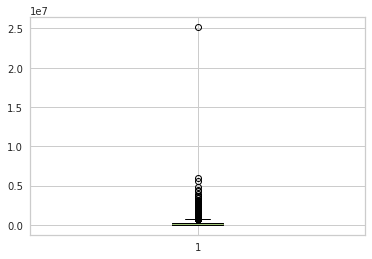

In [449]:
plt.boxplot(jeju_kmeans_test['Monetary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5ee25699a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5ee256c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ee2569640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5ee256c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ee256cac0>],
 'means': []}

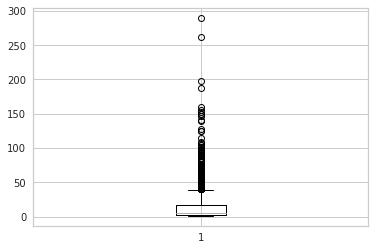

In [450]:
plt.boxplot(jeju_kmeans_test['Frequency'])

In [ ]:
# jeju_total_temp2= jeju_total_temp.groupby('customer_id').agg({'purchase_id':'count'})
# jeju_kmeans_test = jeju_ahn[['customer_id','purchase_id','purchase_date','purchase_amt']].groupby('customer_id').agg({'purchase_id':'count', 'purchase_date' :'count','purchase_amt':'sum'})
# jeju_kmeans_test['Recency'] = jeju_total_temp.groupby('customer_id').agg({'date_diff':'min'})
# jeju_kmeans_test['Frequency']= jeju_total_temp2['purchase_id']
# jeju_kmeans_test['Monetary'] = jeju_kmeans_test['purchase_amt']

# del1 = jeju_kmeans_test[jeju_kmeans_test['purchase_amt']==jeju_kmeans_test['purchase_amt'].max()].index
# jeju_kmeans_test.drop(del1[0], axis = 0, inplace = True)
# del2 = jeju_kmeans_test[jeju_kmeans_test['Frequency']==jeju_kmeans_test['Frequency'].max()].index
# jeju_kmeans_test.drop(del2[0], axis = 0, inplace = True)

# jeju_kmeans_test = jeju_kmeans_test[jeju_kmeans_test['Frequency'] < 70]
# jeju_kmeans_test = jeju_kmeans_test[jeju_kmeans_test['Monetary'] < 0.2e7]

In [ ]:
# aa = jeju_total_temp.groupby('customer_id').agg({'date_diff':'min'})
# jeju_total_temp[jeju_total_temp['customer_id'] == 'C118291']

In [135]:
m_upper = np.percentile(jeju_kmeans_run['Monetary'], 75)
m_lower = np.percentile(jeju_kmeans_run['Monetary'], 25)
m_mean = np.percentile(jeju_kmeans_run['Monetary'], 50)
m_iqr = m_upper - m_lower 
m_upper_whisker = m_upper + 1.5*m_iqr
m_lower_whisker = m_lower - 1.5*m_iqr
global m_stand
m_stand  = [1006675.0, 505700.0, 150650.0, 37050.0]

f_upper = np.percentile(jeju_kmeans_run['Frequency'], 75)
f_lower = np.percentile(jeju_kmeans_run['Frequency'], 25)
f_mean = np.percentile(jeju_kmeans_run['Frequency'], 50)
f_iqr = f_upper - f_lower 
f_upper_whisker = f_upper + 1.5*f_iqr
f_lower_whisker = f_lower - 1.5*f_iqr
global f_stand
f_stand = [60,20,7,2]

r_upper = np.percentile(jeju_kmeans_run['Recency'], 75)
r_lower = np.percentile(jeju_kmeans_run['Recency'], 25)
r_mean = np.percentile(jeju_kmeans_run['Recency'], 50)
r_iqr = r_upper - r_lower 
r_upper_whisker = r_upper + 1.5*r_iqr
r_lower_whisker = r_lower - 1.5*r_iqr
global r_stand
r_stand = [100,30,8,1]
jeju_kmeans_run
def m_scoring(val):
#     m_stand = []
#     for i in range(1,5):
#         stand = 0.2e7 * (0.2*(5-i))
#         m_stand.append(stand)
    if val > m_stand[0]:
        return 5
    elif val > m_stand[1]:
        return 4
    elif val > m_stand[2]:
        return 3
    elif val > m_stand[3]:
        return 2
    else:
        return 1
def f_scoring(val):
#     f_stand = []
#     for i in range(1,5):
#         stand = 70 * (0.2*(5-i))
#         f_stand.append(stand)
    if val > f_stand[0]:
        return 5
    elif val > f_stand[1]:
        return 4
    elif val > f_stand[2]:
        return 3
    elif val > f_stand[3]:
        return 2
    else:
        return 1
def r_scoring(val):
#     r_stand = []
#     for i in range(1,5):
#         stand = jeju_kmeans_run['Recency'].max() * (0.2*(5-i))
#         r_stand.append(stand)
    if val > r_stand[0]:
        return 1
    elif val > r_stand[1]:
        return 2
    elif val > r_stand[2]:
        return 3
    elif val > r_stand[3]:
        return 4
    else:
        return 5
jeju_kmeans_run['R_score'] = jeju_kmeans_run['Recency'].apply(r_scoring)
jeju_kmeans_run['F_score'] = jeju_kmeans_run['Frequency'].apply(f_scoring)
jeju_kmeans_run['M_score'] = jeju_kmeans_run['Monetary'].apply(m_scoring)

In [98]:
m_stand  = [906675.0, 305700.0, 86650.0, 25050.0]

In [57]:
r_stand = [124,40,11,2]

[293.5, 124.0, 40.0, 11.0]

In [74]:
f_stand = [39.5,17,8,2]

[39.5, 17.0, 5.0, 2.0]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f2870ff10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f286956a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f2870f640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f28695040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f1c50a2b0>],
 'means': []}

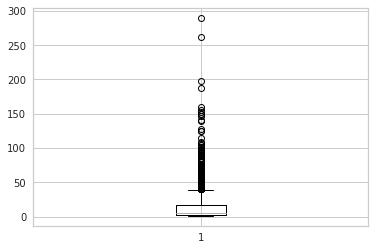

In [75]:
plt.boxplot(jeju_kmeans_run['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f27cc4a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f27cce160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f27cc4700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f27cce820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f27cceb80>],
 'means': []}

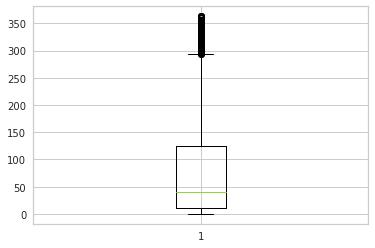

In [62]:
plt.boxplot(jeju_kmeans_run['Recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5f1c42d550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5f1c3fb3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5f263e8370>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5f287a18e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5f1c434430>],
 'means': []}

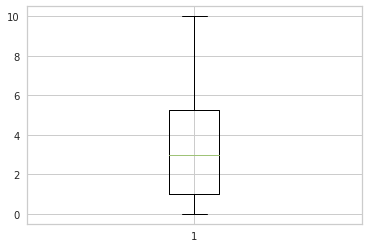

In [59]:
plt.boxplot(jeju_kmeans_run[jeju_kmeans_run['Recency'] < 11]['Recency'])

In [24]:
jeju_kmeans_run

,Recency,Frequency,Monetary,R_score,F_score,M_score
customer_id,,,,,,
C118291,0,19,521550,5,4,4
C118294,43,11,119850,3,3,3
C118295,123,2,25900,3,1,2
C118298,13,37,311100,4,4,4
C118299,321,1,7600,1,1,1
...,...,...,...,...,...,...
C704198,4,4,49850,5,2,2
C704239,0,1,18900,5,1,1
C704271,9,4,43800,5,2,2


/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

Text(0.5, 0, 'M_score')

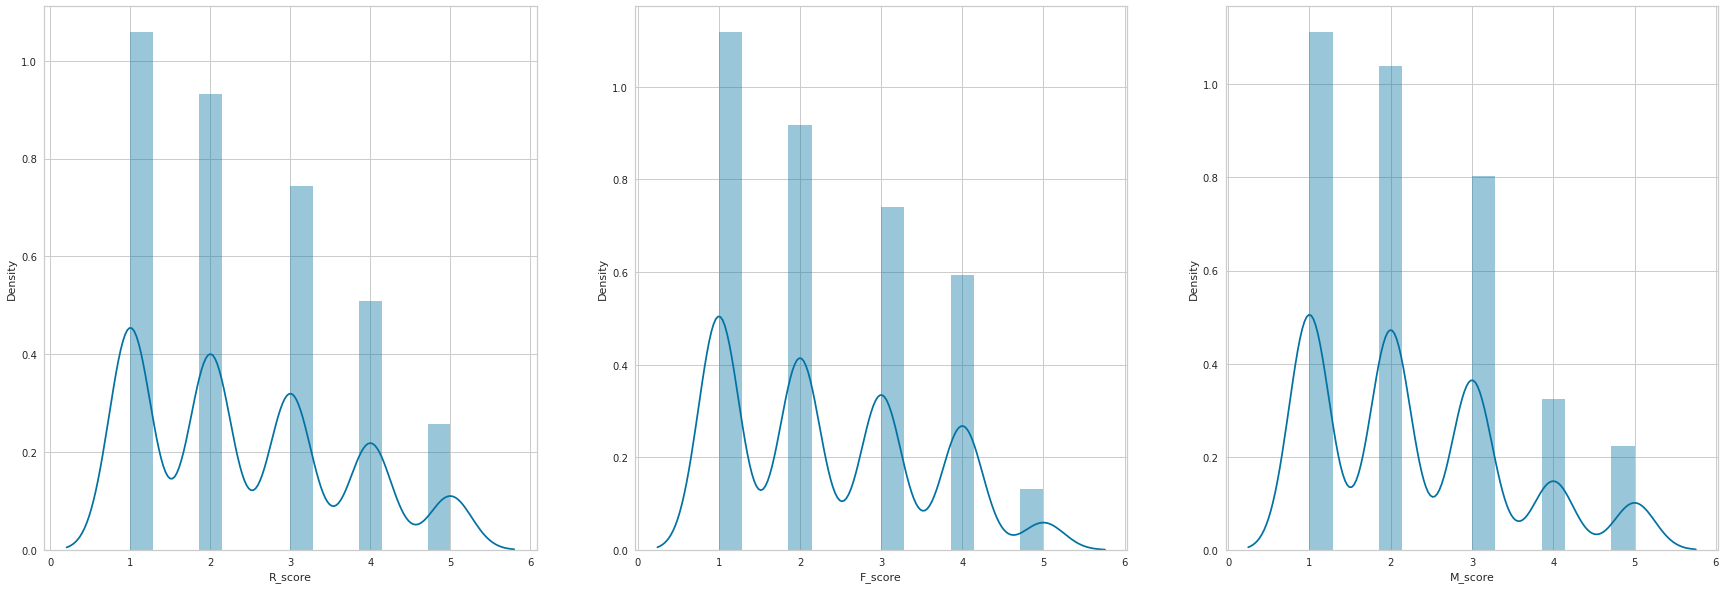

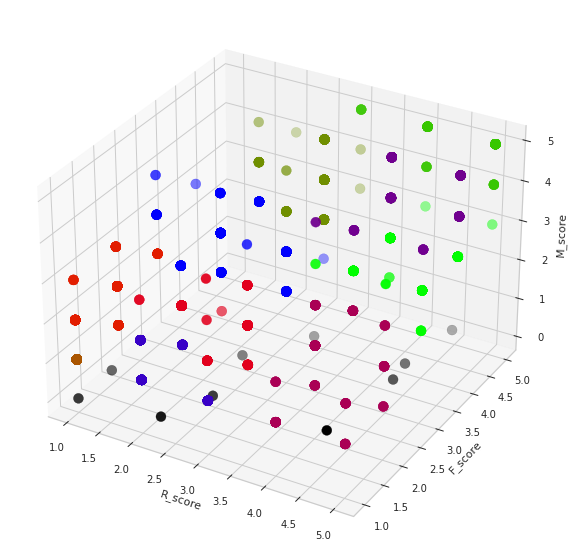

In [189]:
markers = ['o', 'x', '^', '#']
labels = ['Group A', 'Group B', 'Group C',' Group D']
fig, axes = plt.subplots(1, 3, figsize=(30,10))
for i, feature in enumerate(list(jeju_kmeans_run.iloc[:,3:6].columns)):
    sns.distplot(jeju_kmeans_run.iloc[:,3:][feature], ax = axes[i], norm_hist = False)

model1 = KMeans(n_clusters= 10, random_state = 1234).fit(jeju_kmeans_run.iloc[:,3:6])
centers = model1.cluster_centers_
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(jeju_kmeans_run['R_score'],jeju_kmeans_run['F_score'],jeju_kmeans_run['M_score'], cmap = 'brg', 
           s = 100, c=model1.predict(jeju_kmeans_run.iloc[:,3:6]), )
ax.scatter(centers[:,0], centers[:,1], c = 'black', label = 'Centroids', s = 100)
ax.set_xlabel('R_score') 
ax.set_ylabel('F_score')
ax.set_zlabel('M_score')

Text(0, 0.5, 'R_score')

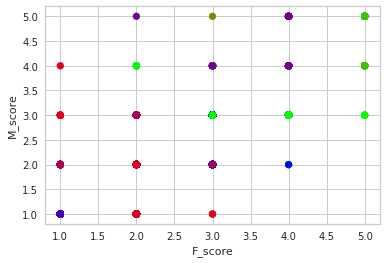

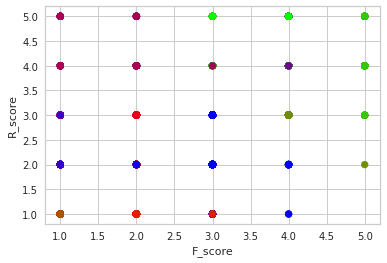

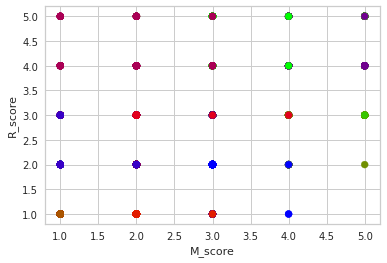

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_run['F_score'],jeju_kmeans_run['M_score'], cmap = 'brg', 
                                                      c=model1.predict(jeju_kmeans_run.iloc[:,3:6]))
ax.set_ylabel('M_score') 
ax.set_xlabel('F_score')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_run['F_score'],jeju_kmeans_run['R_score'], cmap = 'brg', label = ['Group A', 'Group B', 'Group C',' Group D'],
          c=model1.predict(jeju_kmeans_run.iloc[:,3:6]))
ax.set_ylabel('R_score') 
ax.set_xlabel('F_score')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(jeju_kmeans_run['M_score'],jeju_kmeans_run['R_score'], cmap = 'brg',
          c=model1.predict(jeju_kmeans_run.iloc[:,3:6]))
ax.set_xlabel('M_score') 
ax.set_ylabel('R_score')

In [191]:
jeju_kmeans_run['Cluster'] = model1.labels_
jeju_kmeans_run_count = jeju_kmeans_run[['Cluster']]
jeju_kmeans_run_count.groupby('Cluster').agg({'Cluster':'count'})

,Cluster
Cluster,
0,397
1,275
2,149
3,128
4,288
5,298
6,400
7,182
8,83


In [192]:
jeju_kmeans_run.groupby('Cluster').agg({'R_score':'mean','F_score':'mean','M_score':'mean' })

,R_score,F_score,M_score
Cluster,,,
0,2.314861,3.005038,2.765743
1,2.174545,1.167273,1.123636
2,4.308725,3.912752,4.362416
3,4.203125,1.960938,1.859375
4,2.496528,1.937500,1.989583
5,1.000000,1.805369,1.879195
6,1.000000,1.000000,1.000000
7,2.906593,3.917582,3.791209
8,4.457831,5.000000,4.867470


In [193]:
def change_cluster(val):
    if val == 8 :
        return '1Royal'
    elif val == 2 or val == 9:
        return '2Platinum'
    elif val == 0 or val == 7 or val == 3:
        return '3Gold'
    elif val == 6 or val == 5 or val == 1 or val == 4:
        return '4Silver'

jeju_kmeans_run['Re_grade'] = jeju_kmeans_run['Cluster'].apply(change_cluster)

In [194]:
a = jeju_ahn_2019[['customer_id','customer_grade']]
a.drop_duplicates(['customer_id'], inplace=True)
a

<ipython-input-194-3a5fd819faea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.drop_duplicates(['customer_id'], inplace=True)


,customer_id,customer_grade
0,C118291,1Royal
86,C118294,2Platinum
106,C118295,3Gold
111,C118298,2Platinum
195,C118299,4Silver
...,...,...
11314,C701953,3Gold
11319,C701955,3Gold
11324,C701957,3Gold
11336,C701961,3Gold


In [202]:
a.groupby('customer_grade').agg({'customer_id':'count'})
# original grade 인원 수
re_graded = jeju_kmeans_run.reset_index(inplace = False)
find_distribution_revised = re_graded[['customer_id','Re_grade']]
find_distribution_revised=find_distribution_revised.groupby('Re_grade').agg({'customer_id':'count'})
find_distribution_revised.sum()
# 바꾼거 grade 인원 수find_distribution_revised

customer_id    2361
dtype: int64

In [217]:
grade_data_2019 = pd.merge(re_graded[['customer_id','Re_grade']], a, on = 'customer_id', how = 'left')
grade_data_2019_revised = grade_data_2019.groupby(['customer_grade','Re_grade']).agg({'customer_id':'count'})
grade_data_2019_revised1 = grade_data_2019_revised.reset_index(inplace = False)
grade_data_2019_revised2 = grade_data_2019_revised1.pivot(index = 'customer_grade',columns = 'Re_grade', values = 'customer_id')
grade_data_2019_revised2['Sum'] = grade_data_2019_revised2.sum(axis = 1)
grade_data_2019_revised2

Re_grade,1Royal,2Platinum,3Gold,4Silver,Sum
customer_grade,,,,,
1Royal,41.0,19.0,22.0,7.0,89.0
2Platinum,30.0,171.0,316.0,196.0,713.0
3Gold,12.0,119.0,360.0,827.0,1318.0
4Silver,NaN,1.0,9.0,231.0,241.0


In [219]:
temp = pd.DataFrame(grade_data_2019_revised2.sum(axis = 0)).T
temp

Re_grade,1Royal,2Platinum,3Gold,4Silver,Sum
0,83.0,310.0,707.0,1261.0,2361.0


In [227]:
data_2019_final = pd.concat([grade_data_2019_revised2, temp])
data_2019_final.fillna(0, inplace = True)
data_2019_final.rename(index = {0:'Re_grade_Sum'}, inplace = True)
data_2019_final

# temp = pd.DataFrame(grade_data_2019_revised2.sum(axis = 0)).T
# temp

Re_grade,1Royal,2Platinum,3Gold,4Silver,Sum
1Royal,41.0,19.0,22.0,7.0,89.0
2Platinum,30.0,171.0,316.0,196.0,713.0
3Gold,12.0,119.0,360.0,827.0,1318.0
4Silver,0.0,1.0,9.0,231.0,241.0
Re_grade_Sum,83.0,310.0,707.0,1261.0,2361.0


In [468]:
re_graded

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,Cluster,Re_grade
0,C118291,0,19,521550,5,3,4,2,2Platinum
1,C118294,43,11,119850,2,3,2,0,3Gold
2,C118295,123,2,25900,1,1,1,6,4Silver
3,C118298,13,37,311100,3,4,3,7,3Gold
4,C118299,321,1,7600,1,1,1,6,4Silver
...,...,...,...,...,...,...,...,...,...
2356,C704198,4,4,49850,4,2,2,3,3Gold
2357,C704239,0,1,18900,5,1,1,3,3Gold
2358,C704271,9,4,43800,3,2,2,4,4Silver
2359,C704612,10,1,10800,3,1,1,1,4Silver


In [471]:
answer_y = re_graded['Re_grade']
answer_x = re_graded[['Recency','Frequency','Monetary']]

tree_uncustomized = DecisionTreeClassifier()
tree_uncustomized.fit(answer_x, answer_y)
df_importance = pd.DataFrame()
df_importance['Feature'] = answer_x.columns
df_importance['Importance'] = tree_uncustomized.feature_importances_
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,Frequency,0.541
0,Recency,0.398
2,Monetary,0.062


In [201]:
re_graded

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,Cluster,Re_grade
0,C118291,0,19,521550,5,3,4,2,2Platinum
1,C118294,43,11,119850,2,3,2,0,3Gold
2,C118295,123,2,25900,1,1,1,6,4Silver
3,C118298,13,37,311100,3,4,3,7,3Gold
4,C118299,321,1,7600,1,1,1,6,4Silver
...,...,...,...,...,...,...,...,...,...
2356,C704198,4,4,49850,4,2,2,3,3Gold
2357,C704239,0,1,18900,5,1,1,3,3Gold
2358,C704271,9,4,43800,3,2,2,4,4Silver
2359,C704612,10,1,10800,3,1,1,1,4Silver


In [398]:
re_graded[re_graded['Monetary'] == re_graded['Monetary'].max()]['customer_id']

1316    C541748
Name: customer_id, dtype: object

In [399]:
re_graded[re_graded['Frequency'] == re_graded['Frequency'].max()]['customer_id']

1316    C541748
Name: customer_id, dtype: object

In [196]:
re_graded = jeju_kmeans_run.reset_index(inplace = False)
find_distribution_revised = re_graded[['customer_id','Re_grade']]
find_distribution_revised=find_distribution_revised.groupby('Re_grade').agg({'customer_id':'count'})
find_distribution_revised
# find_distribution_revised1 = find_distribution_revised.reindex(index=['한라봉','천혜향','귤','낑깡'])
# find_distribution_revised1 
# 바꾼거 grade 인원 수find_distribution_revised
re_graded1 = re_graded.groupby('Re_grade').agg({'customer_id':'count'})
re_graded2 = re_graded.groupby('Re_grade').agg({'Monetary':'sum'}).round(3)
re_graded2['customer_transaction'] = (re_graded2['Monetary'] / re_graded1['customer_id']).round(3)
original1 =jeju_ahn_2019.groupby(['customer_id', 'customer_grade']).agg({'purchase_amt':'sum'})
original1 = original1.reset_index(inplace = False)
original1 = original1.groupby('customer_grade').agg({'customer_id':'count','purchase_amt':'sum'})

original1['customer_transcation'] = (original1['purchase_amt'] / original1['customer_id']).round(3) 


final_table = pd.DataFrame()
final_table['기존_고객수'] = original1['customer_id']
final_table['새로운_고객수'] = re_graded1['customer_id']
final_table['증가수'] = final_table['새로운_고객수'] - final_table['기존_고객수']
final_table['기존_객단가'] = original1['customer_transcation']
final_table['새로운_객단가'] = re_graded2['customer_transaction']
final_table

,기존_고객수,새로운_고객수,증가수,기존_객단가,새로운_객단가
customer_grade,,,,,
1Royal,89,83,-6,1946676.404,2295271.012
2Platinum,713,310,-403,408732.568,657391.684
3Gold,1318,707,-611,158577.678,326612.883
4Silver,241,1261,1020,39780.270,46041.810


In [465]:
final_table['예상_고객수'] = (1.3 * final_table['새로운_고객수'])
final_table['고객수_증가(예상-새로운)'] = 0.3 * final_table['새로운_고객수']
final_table['등급별_예상_매출액'] = 1.3 * (final_table['새로운_고객수'] * final_table['새로운_객단가'])
final_table

,기존_고객수,새로운_고객수,증가수,기존_객단가,새로운_객단가,예상_고객수,등급별_예상_매출액,고객수_증가(예상-새로운)
customer_grade,,,,,,,,
1Royal,89,83,-6,1946676.404,2295271.012,107.9,2.476597e+08,24.9
2Platinum,713,310,-403,408732.568,657391.684,403.0,2.649288e+08,93.0
3Gold,1318,707,-611,158577.678,326612.883,919.1,3.001899e+08,212.1
4Silver,241,1261,1020,39780.270,46041.810,1639.3,7.547634e+07,378.3


In [467]:
(1.3 * final_table['기존_고객수'] * final_table['기존_객단가']).sum()

888254829.2982

In [466]:
print('예상 매출액', (1.3 * final_table['새로운_고객수'] * final_table['새로운_객단가']).sum())

예상 매출액 888254830.7451


In [ ]:
data_2019_final = pd.concat([grade_data_2019_revised2, temp])
data_2019_final.fillna(0, inplace = True)
data_2019_final.rename(index = {0:'Re_grade_Sum'}, inplace = True)
data_2019_final

# temp = pd.DataFrame(grade_data_2019_revised2.sum(axis = 0)).T
# temp

In [200]:
re_graded.groupby('Re_grade').agg({'Recency' : ['mean','min','max'], 'Frequency' : ['mean','min','max'], 'Monetary':['mean','min','max','sum']}).round(3)

Recency          Frequency              Monetary                    \
              mean min  max      mean min  max         mean     min       max   
Re_grade                                                                        
1Royal       2.518   0   21    93.349  61  289  2295271.012  595783  25144440   
2Platinum    3.006   0    8    29.858   6   67   657391.684  112150   3058050   
3Gold       30.741   0  285    16.208   1   99   326612.883    1600   2744330   
4Silver    134.711   9  363     2.733   1   12    46041.810    1000    756700   

                      
                 sum  
Re_grade              
1Royal     190507494  
2Platinum  203791422  
3Gold      230915308  
4Silver     58058722

In [197]:
(final_table['기존_고객수'] * final_table['기존_객단가']).sum(0)

683272945.6140002

In [198]:
(final_table['새로운_고객수'] * final_table['새로운_객단가']).sum()

683272946.727

In [ ]:
# re_graded[re_graded['customer_id'] == 'C541748']

In [ ]:
re_graded.groupby('Re_grade').agg({'Recency' : ['mean','min','max'], 'Frequency' : ['mean','min','max'], 'Monetary':['mean','min','max','sum']}).round(3)

In [37]:
re_graded2 = re_graded.groupby('Re_grade').agg({'Monetary':'sum'}).round(3)
re_graded2

,Monetary
Re_grade,
1Royal,507737811
2Platinum,137010868
3Gold,20242627
4Silver,18281640


In [38]:
re_graded1 = re_graded.groupby('Re_grade').agg({'customer_id':'count'})
re_graded1

,customer_id
Re_grade,
1Royal,505
2Platinum,723
3Gold,572
4Silver,561


In [39]:
re_graded2['customer_transaction'] = (re_graded2['Monetary'] / re_graded1['customer_id']).round(3)
re_graded2

,Monetary,customer_transaction
Re_grade,,
1Royal,507737811,1005421.408
2Platinum,137010868,189503.275
3Gold,20242627,35389.208
4Silver,18281640,32587.594


## 새로운거 객단가 (2년치)

In [41]:
jeju_ahn_2019.groupby('customer_grade').agg({'purchase_amt':'sum'})

,purchase_amt
customer_grade,
1Royal,173254200
2Platinum,291426321
3Gold,209005380
4Silver,9587045


In [43]:
original1 =jeju_ahn_2019.groupby(['customer_id', 'customer_grade']).agg({'purchase_amt':'sum'})
original1 = original1.reset_index(inplace = False)
original1 = original1.groupby('customer_grade').agg({'customer_id':'count','purchase_amt':'sum'})

original1['customer_transcation'] = (original1['purchase_amt'] / original1['customer_id']).round(3) 
original1

,customer_id,purchase_amt,customer_transcation
customer_grade,,,
1Royal,89,173254200,1946676.404
2Platinum,713,291426321,408732.568
3Gold,1318,209005380,158577.678
4Silver,241,9587045,39780.270


In [44]:
re_graded2['new_customer_id'] = re_graded1['customer_id']
re_graded2['original_customer_id'] = original1['customer_id']
re_graded2['original_customer_transaction'] = original1['customer_transcation']
re_graded2.drop('Monetary', axis = 1)

,customer_transaction,new_customer_id,original_customer_id,original_customer_transaction
Re_grade,,,,
1Royal,1005421.408,505,89,1946676.404
2Platinum,189503.275,723,713,408732.568
3Gold,35389.208,572,1318,158577.678
4Silver,32587.594,561,241,39780.270


In [47]:
final_table = pd.DataFrame()
final_table['기존_고객수'] = original1['customer_id']
final_table['새로운_고객수'] = re_graded1['customer_id']
final_table['증가수'] = final_table['새로운_고객수'] - final_table['기존_고객수']
final_table['기존_객단가'] = original1['customer_transcation']
final_table['새로운_객단가'] = re_graded2['customer_transaction']
final_table

,기존_고객수,새로운_고객수,증가수,기존_객단가,새로운_객단가
customer_grade,,,,,
1Royal,89,505,416,1946676.404,1005421.408
2Platinum,713,723,10,408732.568,189503.275
3Gold,1318,572,-746,158577.678,35389.208
4Silver,241,561,320,39780.270,32587.594


In [229]:
revised_2019 = jeju_ahn_2019[['customer_id', 'purchase_id', 'store_id','purchase_yearmonth','purchase_hour','item_g_m','purchase_amt']]

In [303]:
test = 'C118291'
'2Platinum' in re_graded[re_graded['customer_id'] == str(test)]['Re_grade'].values


True

In [306]:
def grade_input(val):
    prove = re_graded[re_graded['customer_id'] == str(val)]['Re_grade'].values
    if '1Royal' in prove:
        return '1Royal'
    elif '2Platinum' in prove:
        return '2Platinum'
    elif '3Gold' in prove:
        return '3Gold'
    elif '4Silver' in prove:
        return '4Silver'
revised_2019['Re_grade'] = revised_2019['customer_id'].apply(grade_input)
revised_2019_1 = revised_2019[revised_2019['Re_grade'] == '1Royal']
revised_2019_2 = revised_2019[revised_2019['Re_grade'] == '2Platinum']
revised_2019_3 = revised_2019[revised_2019['Re_grade'] == '3Gold']
revised_2019_4 = revised_2019[revised_2019['Re_grade'] == '4Silver']

<ipython-input-306-682df508d178>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revised_2019['Re_grade'] = revised_2019['customer_id'].apply(grade_input)


In [310]:
revised_2019.head(10)

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_hour,item_g_m,purchase_amt,Re_grade
0,C118291,C118291_20190128_57,제주매장,2019M01,14,버섯,600,2Platinum
1,C118291,C118291_20190128_57,제주매장,2019M01,14,과자,6600,2Platinum
2,C118291,C118291_20190128_57,제주매장,2019M01,14,한우,13900,2Platinum
3,C118291,C118291_20190128_57,제주매장,2019M01,14,버섯,3300,2Platinum
4,C118291,C118291_20190128_57,제주매장,2019M01,14,김치,10900,2Platinum
5,C118291,C118291_20190223_109,제주매장,2019M02,17,밀가공,5400,2Platinum
6,C118291,C118291_20190223_109,제주매장,2019M02,17,한우,13900,2Platinum
7,C118291,C118291_20190410_106,제주매장,2019M04,16,과자,21000,2Platinum
8,C118291,C118291_20190410_106,제주매장,2019M04,16,과자,2600,2Platinum
9,C118291,C118291_20190410_106,제주매장,2019M04,16,과자,1300,2Platinum


In [ ]:
best_customer = revised_2019

In [404]:
re_graded[re_graded['customer_id'] == 'C541748']

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,Cluster,Re_grade
1316,C541748,0,289,25144440,5,5,5,8,1Royal


In [406]:
re_graded[re_graded['customer_id'] == 'C134987']

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,Cluster,Re_grade
50,C134987,357,2,50700,1,1,2,5,4Silver


In [444]:
aa = jeju_ahn_2019.groupby(['customer_id','purchase_date']).agg({'purchase_amt':'sum'})
aa.reset_index(inplace = True)
aa.groupby('customer_id').agg({'purchase_date':'count'})


,purchase_date
customer_id,
C118291,19
C118294,11
C118295,2
C118298,37
C118299,1
...,...
C704198,4
C704239,1
C704271,4


In [434]:
final_tablejeju_kmeans_run[jeju_kmeans_run.index == 'C118298']

,Recency,Frequency,Monetary,R_score,F_score,M_score,Cluster,Re_grade
customer_id,,,,,,,,
C118298,13,37,311100,3,4,3,7,3Gold


In [402]:
best_customer = revised_2019[revised_2019['customer_id'] == 'C541748'].groupby('item_g_m').agg({'purchase_id':'count', 'purchase_amt':'sum'})
best_customer.sort_values(by = ['purchase_id'], axis = 0, ascending = False, inplace = True)
best_customer.head(5)

,purchase_id,purchase_amt
item_g_m,,
두부/유부,309,13304350
가루,288,2692810
장,287,2760380
밀가공,207,3362400
뿌리채소,89,1366360


In [403]:
best_customer.sort_values(by = ['purchase_amt'], axis = 0, ascending = False, inplace = True)
best_customer.head(10)

,purchase_id,purchase_amt
item_g_m,,
두부/유부,309,13304350
밀가공,207,3362400
장,287,2760380
가루,288,2692810
뿌리채소,89,1366360
기름/식초,48,761110
유제품,69,345260
잎채소,38,98950
소스/기타양념,12,89950


In [ ]:
royal_product.sort_values(by=['purchase_id'], axis =0,ascending = False, inplace = True)

In [309]:
set(revised_2019_3['Re_grade'])

{'3Gold'}

가장 많은 판매건수는 19 시


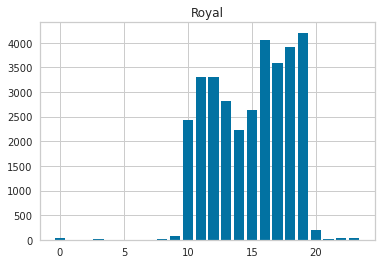

In [341]:
royal_time_plot = revised_2019_1.groupby('purchase_hour').agg({'purchase_id':'count'})
pla_time_plot = revised_2019_2.groupby('purchase_hour').agg({'purchase_id':'count'})
gold_time_plot = revised_2019_3.groupby('purchase_hour').agg({'purchase_id':'count'})
silver_time_plot = revised_2019_4.groupby('purchase_hour').agg({'purchase_id':'count'})
plt.bar(royal_time_plot.index, royal_time_plot['purchase_id'])
plt.title('Royal')
print('가장 많은 판매건수는', royal_time_plot[royal_time_plot['purchase_id'] == royal_time_plot['purchase_id'].max()].index[0],'시')

가장 많은 판매건수는 16 시


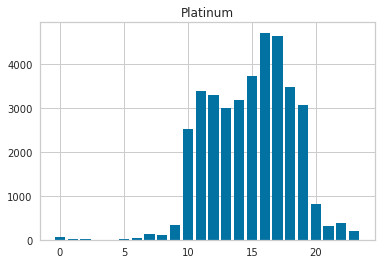

In [342]:
plt.bar(pla_time_plot.index, pla_time_plot['purchase_id'])
plt.title('Platinum')
print('가장 많은 판매건수는', pla_time_plot[pla_time_plot['purchase_id'] == pla_time_plot['purchase_id'].max()].index[0],'시')

가장 많은 판매건수는 17 시


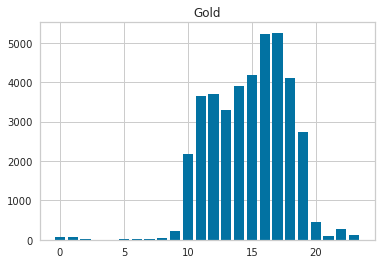

In [344]:
plt.bar(gold_time_plot.index, gold_time_plot['purchase_id'])
plt.title('Gold')
print('가장 많은 판매건수는', gold_time_plot[gold_time_plot['purchase_id'] == gold_time_plot['purchase_id'].max()].index[0],'시')

가장 많은 판매건수는 17 시


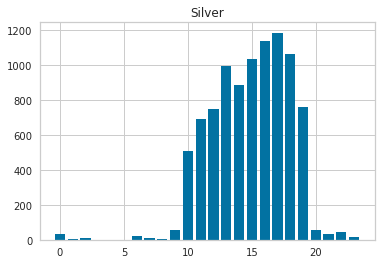

In [345]:
plt.bar(silver_time_plot.index, silver_time_plot['purchase_id'])
plt.title('Silver')
print('가장 많은 판매건수는', silver_time_plot[silver_time_plot['purchase_id'] == silver_time_plot['purchase_id'].max()].index[0],'시')

Text(0.5, 1.0, 'Royal_purchase_id')

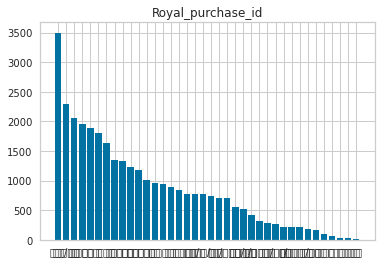

In [376]:
royal_product = revised_2019_1.groupby('item_g_m').agg({'purchase_id':'count','purchase_amt':'sum'})
royal_product.sort_values(by=['purchase_id'], axis =0,ascending = False, inplace = True)
plt.bar(royal_product.index, royal_product['purchase_id'])
plt.title('Royal_purchase_id')

Text(0.5, 1.0, 'Royal_purchase_amt')

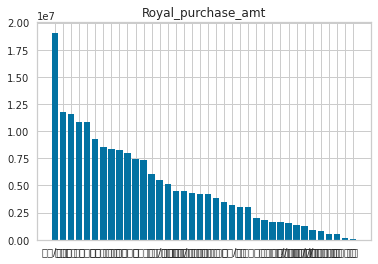

In [377]:
royal_product.sort_values(by=['purchase_amt'], axis =0,ascending = False, inplace = True)
plt.bar(royal_product.index, royal_product['purchase_amt'])
plt.title('Royal_purchase_amt')

In [392]:
royal_product.head(10)

,purchase_id,purchase_amt
item_g_m,,
두부/유부,2301,19065580
육가공,1231,11740920
멥쌀,845,11567175
한우,554,10888275
밀가공,1635,10835195
가루,960,9315530
잎채소,3497,8523875
유정란,1347,8319025
유제품,1881,8236523


Text(0.5, 1.0, 'Platinum_purchase_id')

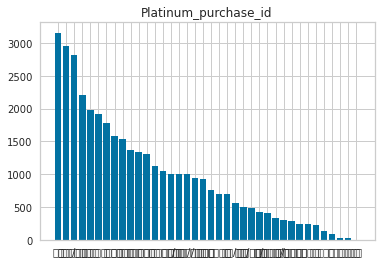

In [382]:
pla_product = revised_2019_2.groupby('item_g_m').agg({'purchase_id':'count','purchase_amt':'sum'})
pla_product.sort_values(by=['purchase_id'], axis =0,ascending = False, inplace = True)
plt.bar(pla_product.index, pla_product['purchase_id'])
plt.title('Platinum_purchase_id')
subplots()


Text(0.5, 1.0, 'Platinum_purchase_amt')

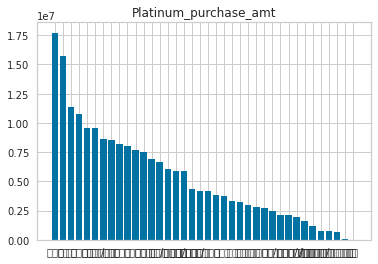

In [380]:
pla_product.sort_values(by=['purchase_amt'], axis =0,ascending = False, inplace = True)
plt.bar(pla_product.index, pla_product['purchase_amt'])
plt.title('Platinum_purchase_amt')

In [393]:
pla_product.head(10)

,purchase_id,purchase_amt
item_g_m,,
과자,3156,11376568
잎채소,2951,6630445
두부/유부,2819,8637358
밀가공,2201,10800690
육가공,1974,17714930
유제품,1919,9528125
빵,1773,6917415
밑반찬,1583,7506585
열매채소,1542,4326230


Text(0.5, 1.0, 'Gold_purchase_id')

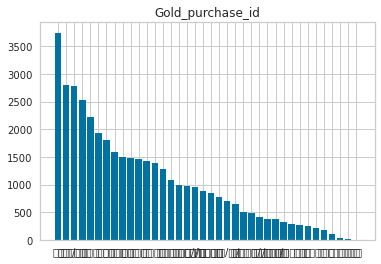

In [390]:
gold_product = revised_2019_3.groupby('item_g_m').agg({'purchase_id':'count','purchase_amt':'sum'})
gold_product.sort_values(by=['purchase_id'], axis =0,ascending = False, inplace = True)
plt.bar(gold_product.index, gold_product['purchase_id'])
plt.title('Gold_purchase_id')


Text(0.5, 1.0, 'Gold_purchase_amt')

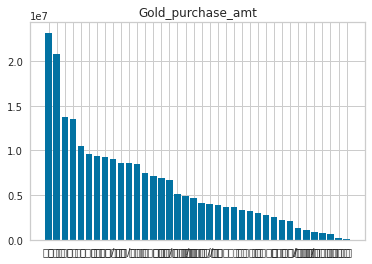

In [391]:
gold_product.sort_values(by=['purchase_amt'], axis =0,ascending = False, inplace = True)
plt.bar(gold_product.index, gold_product['purchase_amt'])
plt.title('Gold_purchase_amt')

In [394]:
gold_product.head(10)

,purchase_id,purchase_amt
item_g_m,,
멥쌀,1290,23159640
육가공,2222,20827085
밀가공,2522,13767095
과자,3747,13467200
가루,1429,10483590
유정란,1484,9622735
한우,494,9416380
식사대용,1504,9240385
기름/식초,699,9022990


Text(0.5, 1.0, 'Silver_purchase_id')

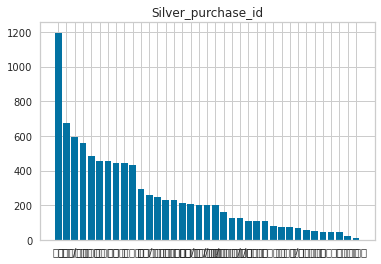

In [386]:
silver_product = revised_2019_4.groupby('item_g_m').agg({'purchase_id':'count','purchase_amt':'sum'})
silver_product.sort_values(by=['purchase_id'], axis =0,ascending = False, inplace = True)
plt.bar(silver_product.index, silver_product['purchase_id'])
plt.title('Silver_purchase_id')


Text(0.5, 1.0, 'Silver_purchase_amt')

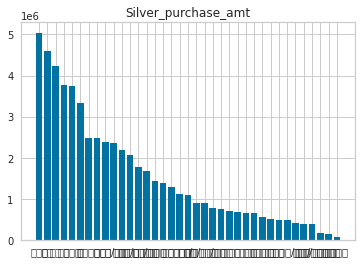

In [387]:
silver_product.sort_values(by=['purchase_amt'], axis =0,ascending = False, inplace = True)
plt.bar(silver_product.index, silver_product['purchase_amt'])
plt.title('Silver_purchase_amt')

In [397]:
silver_product['purchase_amt'].sum() + pla_product['purchase_amt'].sum()+gold_product['purchase_amt'].sum()+royal_product['purchase_amt'].sum()

683272946

In [395]:
silver_product.head(10)

,purchase_id,purchase_amt
item_g_m,,
육가공,557,5043110
과자,1196,4595881
멥쌀,229,4229235
가루,454,3777545
밀가공,673,3741530
장,293,3338070
식사대용,454,2480200
빵,443,2471805
한우,110,2387145


In [ ]:
royal_time_plot = revised_2019_1.groupby('purchase_hour').agg({'purchase_id':'count'})
pla_time_plot = revised_2019_2.groupby('purchase_hour').agg({'purchase_id':'count'})
gold_time_plot = revised_2019_3.groupby('purchase_hour').agg({'purchase_id':'count'})
silver_time_plot = revised_2019_4.groupby('purchase_hour').agg({'purchase_id':'count'})
plt.bar(royal_time_plot.index, royal_time_plot['purchase_id'])
plt.title('Royal')
print('가장 많은 판매건수는', royal_time_plot[royal_time_plot['purchase_id'] == royal_time_plot['purchase_id'].max()].index[0],'시')

In [ ]:
plt.subplots(2,2, figsize = (10,10))
for i in range(4):
    

<BarContainer object of 38 artists>

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: Runtim

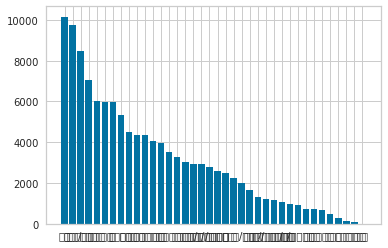

In [255]:
for_plotbar2 = revised_2019.groupby('item_g_m').agg({'purchase_id':'count'})
for_p
for_plotbar2.sort_values(by = 'purchase_id', axis = 0, ascending = False, inplace = True)
for_plotbar2.head()
plt.bar(for_plotbar2.index, for_plotbar2['purchase_id'])

In [256]:
for_plotbar2.head(10)

,purchase_id
item_g_m,
과자,10159
잎채소,9737
두부/유부,8497
밀가공,7031
유제품,6048
육가공,5984
빵,5955
열매채소,5344
밑반찬,4507
